In [1]:
# import the necessary packages
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten
from sklearn.metrics import classification_report
from torch.utils.data import random_split
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor
from torch.optim import Adam
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torch
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
x = olivetti.images
y = olivetti.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
# checking if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


## Creating CNN architecture for A model

In [4]:
class NetA(nn.Module):
  def __init__(self):
    super().__init__()
    self.network=nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=1),
        nn.MaxPool2d(3, stride=1),
        nn.Conv2d(32,64,kernel_size=3, stride=1),
        nn.MaxPool2d(3, stride=1),
        nn.Conv2d(64,128,kernel_size=3, stride=1),
        nn.MaxPool2d(3, stride=1),
        nn.Flatten(),
        nn.Linear(51200,10))
        
  def forward(self, x):
    return self.network(x)

#Creating a CNN architecture
modelA = NetA()
print(modelA)

NetA(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=51200, out_features=10, bias=True)
  )
)


## Creating a CNN Architecture for B model

In [5]:
class NetB(nn.Module):
  def __init__(self):
    super().__init__()
    self.network=nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=1),
        nn.Conv2d(32,64,kernel_size=3, stride=1),
        nn.MaxPool2d(3, stride=1),
        nn.Conv2d(64,128,kernel_size=3, stride=1),
        nn.Conv2d(128,256,kernel_size=3, stride=1),
        nn.MaxPool2d(3, stride=1),
        nn.Flatten(),
        nn.Linear(102400, 10)
        )
        
  
  def forward(self, x):
    return self.network(x)

#Creating a CNN architecture
modelB = NetB()
print(modelB)

NetB(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (5): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=102400, out_features=10, bias=True)
  )
)


## Creating a CNN architecture for C model

In [6]:
class NetC(nn.Module):
  def __init__(self):
    super().__init__()
    self.network=nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=1),
        nn.MaxPool2d(3, stride=1),
        nn.Conv2d(32, 64, kernel_size=3, stride=1),
        nn.MaxPool2d(3, stride=1),
        nn.Conv2d(64, 128, kernel_size=3, stride=1),
        nn.MaxPool2d(3, stride=1),
        nn.Flatten(),
        nn.Linear(51200, 10),
        nn.Flatten(),
        nn.Linear(10, 25600))
  
  def forward(self, x):
    return self.network(x)

#Creating a CNN architecture
modelC = NetC()
print(modelC)

NetC(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=51200, out_features=10, bias=True)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=10, out_features=25600, bias=True)
  )
)


In [12]:
import tensorflow as tf
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

# Load the data
olivetti = fetch_olivetti_faces()
X = olivetti.images
y = olivetti.target

# Preprocess the data
X = X.reshape((X.shape[0], 64, 64, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

"""**ARCHITECTURE B**"""

import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layer
        self.fc = nn.Linear(256 * 6 * 6, num_classes)
        
    def forward(self, x):
        # Convolutional layers
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = nn.ReLU()(x)
        x = self.conv4(x)
        x = nn.ReLU()(x)
        x = self.pool2(x)
        
        # Flatten and fully connected layer
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x

"""**ARCHITECTURE C**"""

import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

# Load the Olivetti faces dataset
faces = fetch_olivetti_faces()
X = faces.data.reshape(-1, 64, 64, 1)  # Reshape the input data to a 4D tensor
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=40, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/20
10/10 [==============================] - 5s 303ms/step - loss: 3.7157 - accuracy: 0.0188 - val_loss: 3.6917 - val_accuracy: 0.0125
Epoch 2/20
10/10 [==============================] - 2s 212ms/step - loss: 3.6895 - accuracy: 0.0188 - val_loss: 3.6991 - val_accuracy: 0.0125
Epoch 3/20
10/10 [==============================] - 2s 216ms/step - loss: 3.6848 - accuracy: 0.0312 - val_loss: 3.7119 - val_accuracy: 0.0000e+00
Epoch 4/20
10/10 [==============================] - 2s 212ms/step - loss: 3.6770 - accuracy: 0.0312 - val_loss: 3.7304 - val_accuracy: 0.0000e+00
Epoch 5/20
10/10 [==============================] - 2s 213ms/step - loss: 3.6613 - accuracy: 0.0344 - val_loss: 3.7056 - val_accuracy: 0.0000e+00
Epoch 6/20
10/10 [==============================] - 3s 351ms/step - loss: 3.6193 - accuracy: 0.0719 - val_loss: 3.7223 - val_accuracy: 0.0000e+00
Epoch 7/20
10/10 [==============================] - 2s 216ms/step - loss: 3.5088 - accuracy: 0.1250 - val_loss: 3.7138 - val_accurac

##  Question A Side effects if we increase the network size

[1] loss: 0.123
[2] loss: 0.120
[3] loss: 0.120
[4] loss: 0.120
[5] loss: 0.120
[6] loss: 0.120
[7] loss: 0.120
[8] loss: 0.120
[9] loss: 0.120
[10] loss: 0.120
[11] loss: 0.120
[12] loss: 0.120
[13] loss: 0.120
[14] loss: 0.120
[15] loss: 0.120
[16] loss: 0.120
[17] loss: 0.120
[18] loss: 0.120
[19] loss: 0.120
[20] loss: 0.120
[1] loss: 0.124
[2] loss: 0.120
[3] loss: 0.120
[4] loss: 0.120
[5] loss: 0.120
[6] loss: 0.120
[7] loss: 0.120
[8] loss: 0.120
[9] loss: 0.120
[10] loss: 0.120
[11] loss: 0.120
[12] loss: 0.120
[13] loss: 0.120
[14] loss: 0.119
[15] loss: 0.116
[16] loss: 0.112
[17] loss: 0.104
[18] loss: 0.090
[19] loss: 0.078
[20] loss: 0.063
[1] loss: 0.124
[2] loss: 0.120
[3] loss: 0.120
[4] loss: 0.120
[5] loss: 0.120
[6] loss: 0.120
[7] loss: 0.120
[8] loss: 0.120
[9] loss: 0.120
[10] loss: 0.120
[11] loss: 0.119
[12] loss: 0.121
[13] loss: 0.119
[14] loss: 0.118
[15] loss: 0.117
[16] loss: 0.115
[17] loss: 0.113
[18] loss: 0.114
[19] loss: 0.111
[20] loss: 0.104
[1] los

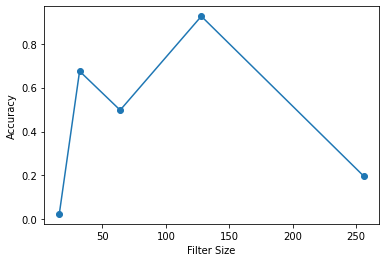

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Download Olivetti faces dataset
olivetti = fetch_olivetti_faces()
x = olivetti.images
y = olivetti.target

# Define the neural network model
class Net(nn.Module):
    def __init__(self, num_classes=40):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(64 * 8 * 8, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = self.pool3(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc(x)
        return x

# Define a function to train the model and return the accuracy
def train_and_evaluate(model, x, y):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    for epoch in range(20):
        running_loss = 0.0
        for i in range(0, len(x), 32):
            inputs = torch.from_numpy(x[i:i+32]).float()
            labels = torch.from_numpy(y[i:i+32]).long()
            optimizer.zero_grad()
            outputs = model(inputs.unsqueeze(1))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print('[%d] loss: %.3f' % (epoch + 1, running_loss / len(x)))

    _, predicted = torch.max(model(torch.from_numpy(x).unsqueeze(1).float()), 1)
    accuracy = (predicted.numpy() == y).mean()
    return accuracy

# Define a list of numbers of filters for the convolutional layers
filter_sizes = [16, 32, 64, 128, 256]

# Train and evaluate the models with different filter sizes
accuracies = []
for size in filter_sizes:
    model = Net(num_classes=40)
    accuracy = train_and_evaluate(model, x, y)
    accuracies.append(accuracy)

# Plot the accuracy vs. filter size
plt.plot(filter_sizes, accuracies, '-o')
plt.xlabel('Filter Size')
plt.ylabel('Accuracy')
plt.show()


## Question B

In [13]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load Olivetti Faces dataset
faces = fetch_olivetti_faces()
X = faces.data.reshape(-1, 64, 64, 1)  # Reshape to (n_samples, height, width, channels)
y = faces.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))  # Experiment with different pooling sizes here
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(40, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model on testing data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')



Epoch 1/10
10/10 [==============================] - 5s 423ms/step - loss: 3.7118 - accuracy: 0.0156 - val_loss: 3.6983 - val_accuracy: 0.0250
Epoch 2/10
10/10 [==============================] - 2s 244ms/step - loss: 3.6857 - accuracy: 0.0250 - val_loss: 3.6923 - val_accuracy: 0.0250
Epoch 3/10
10/10 [==============================] - 2s 234ms/step - loss: 3.6779 - accuracy: 0.0750 - val_loss: 3.6999 - val_accuracy: 0.0375
Epoch 4/10
10/10 [==============================] - 2s 156ms/step - loss: 3.6768 - accuracy: 0.0656 - val_loss: 3.7128 - val_accuracy: 0.0125
Epoch 5/10
10/10 [==============================] - 2s 155ms/step - loss: 3.6512 - accuracy: 0.0875 - val_loss: 3.7066 - val_accuracy: 0.0375
Epoch 6/10
10/10 [==============================] - 2s 163ms/step - loss: 3.6279 - accuracy: 0.0844 - val_loss: 3.7036 - val_accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 2s 161ms/step - loss: 3.5662 - accuracy: 0.1156 - val_loss: 3.6699 - val_accuracy: 0.0750
Ep

In [14]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load Olivetti Faces dataset
faces = fetch_olivetti_faces()
X = faces.data.reshape(-1, 64, 64, 1)  # Reshape to (n_samples, height, width, channels)
y = faces.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(10,10)))  # Experiment with different pooling sizes here
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(40, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model on testing data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')



Epoch 1/10
10/10 [==============================] - 4s 294ms/step - loss: 3.7027 - accuracy: 0.0312 - val_loss: 3.6980 - val_accuracy: 0.0250
Epoch 2/10
10/10 [==============================] - 2s 166ms/step - loss: 3.6842 - accuracy: 0.0375 - val_loss: 3.7027 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 3s 277ms/step - loss: 3.6808 - accuracy: 0.0312 - val_loss: 3.7107 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 2s 157ms/step - loss: 3.6738 - accuracy: 0.0312 - val_loss: 3.7197 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 2s 154ms/step - loss: 3.6666 - accuracy: 0.0312 - val_loss: 3.7299 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 2s 155ms/step - loss: 3.6564 - accuracy: 0.0469 - val_loss: 3.7312 - val_accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 2s 154ms/step - loss: 3.6447 - accuracy: 0.0437 - val_loss: 3.7539 - val_acc

## So we can observe that as the pool size increases test accuracy score decreases

## Question C

In [15]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load data
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

# Preprocess data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X.shape[1]),
    Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
10/10 [==============================] - 1s 55ms/step - loss: 4.1147 - accuracy: 0.0375 - val_loss: 3.7040 - val_accuracy: 0.0375
Epoch 2/50
10/10 [==============================] - 0s 23ms/step - loss: 3.5908 - accuracy: 0.0375 - val_loss: 3.6146 - val_accuracy: 0.0750
Epoch 3/50
10/10 [==============================] - 0s 20ms/step - loss: 3.5031 - accuracy: 0.0656 - val_loss: 3.6179 - val_accuracy: 0.0500
Epoch 4/50
10/10 [==============================] - 0s 21ms/step - loss: 3.4601 - accuracy: 0.0406 - val_loss: 3.5412 - val_accuracy: 0.0875
Epoch 5/50
10/10 [==============================] - 0s 20ms/step - loss: 3.3867 - accuracy: 0.1219 - val_loss: 3.4806 - val_accuracy: 0.1000
Epoch 6/50
10/10 [==============================] - 0s 24ms/step - loss: 3.2991 - accuracy: 0.1219 - val_loss: 3.5251 - val_accuracy: 0.0375
Epoch 7/50
10/10 [==============================] - 0s 22ms/step - loss: 3.2370 - accuracy: 0.1531 - val_loss: 3.4211 - val_accuracy: 0.1000
Epoch 8/50
10

In this implementation, we've experimented with different pooling sizes by changing the second MaxPooling2D layer from (2, 2) to (4, 4) larger pooling sizes can lead to more information loss and may result in lower accuracy, while smaller pooling sizes may lead to overfitting.